# Task 3 - Model Explainability
1. Feature Importance Baseline
2. SHAP Analysis
3. Interpretation
4. Business Recommendations


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import  joblib
import sys
sys.path.append('..')
from src.load import load_data
from src.ploter import Ploter
from src.shap import ShapExplainer
ploter = Ploter()

## Load Model, X_train and X_test

In [3]:
X_train = np.load('../Data/processed/x_credit_train.npy', allow_pickle=True)
X_test = np.load('../Data/processed/x_credit_test.npy', allow_pickle=True)
y_test = np.load('../Data/processed/y_credit_test.npy', allow_pickle=True)
path = ('../Data/processed/feature_names_credit.csv')
feature_names_df = load_data(path)
feature_names = feature_names_df.iloc[:,1].tolist()
best_model = joblib.load('../models/credit_model.joblib')
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)
print(X_train.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


## Built-in Feature Importance (Baseline)

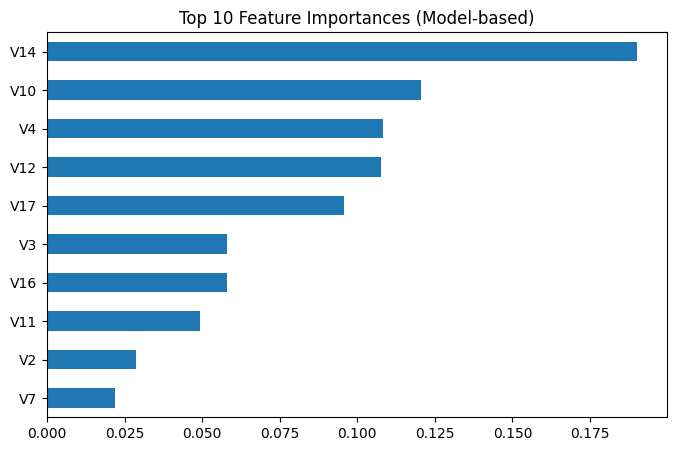

In [5]:
importances = best_model.feature_importances_
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
ploter.bar_feature_importance(feature_importances.head(10))

## SHAP Analysis

In [6]:
shap_explainer = ShapExplainer(model=best_model, x_test=X_test, x_train=X_train)

## Generate SHAP Summary Plot (global feature importance)

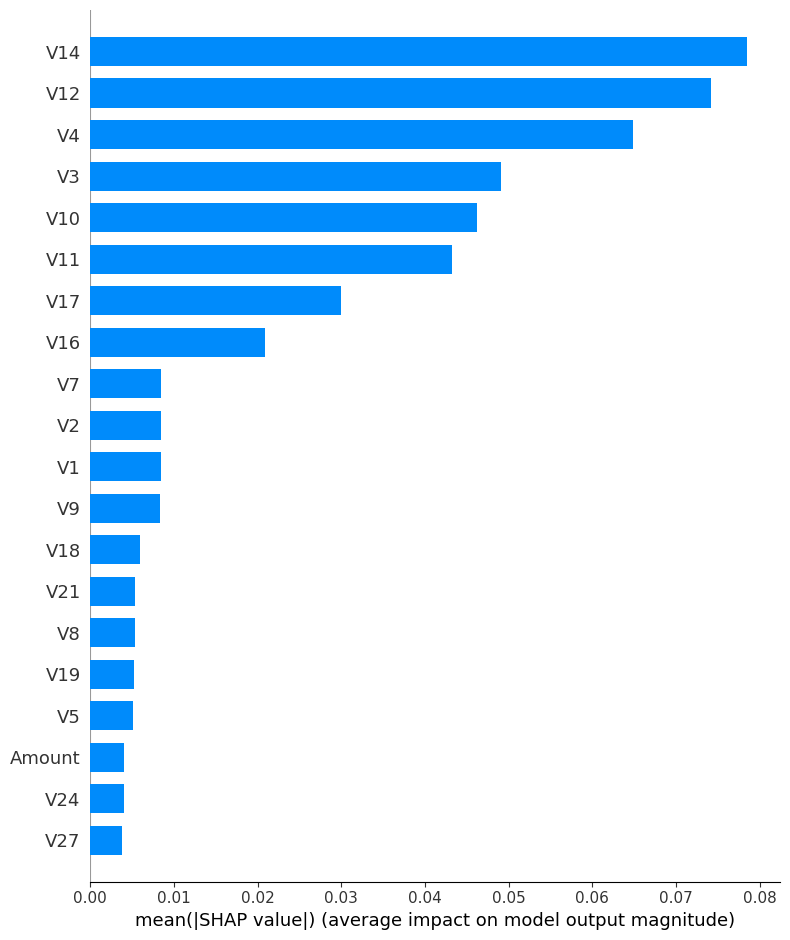

In [7]:
shap_explainer.plot_shap_summary()

## SHAP Force Plots (Local Explanations)

In [8]:
y_pred = best_model.predict(X_test)
true_positive = np.where((y_test==1)&(y_pred==1))[0][0]
false_positive = np.where((y_test==0)&(y_pred==1))[0][0]
false_negative = np.where((y_test==1)&(y_pred==0))[0][0]

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


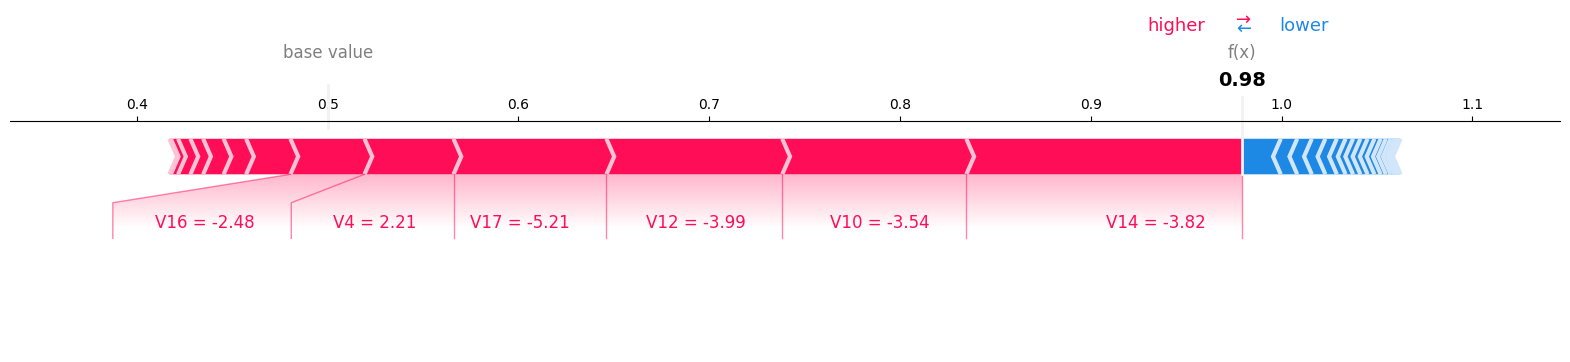

In [ ]:
shap_explainer.plot_force(true_positive) # true positive (correctly identified fraud)

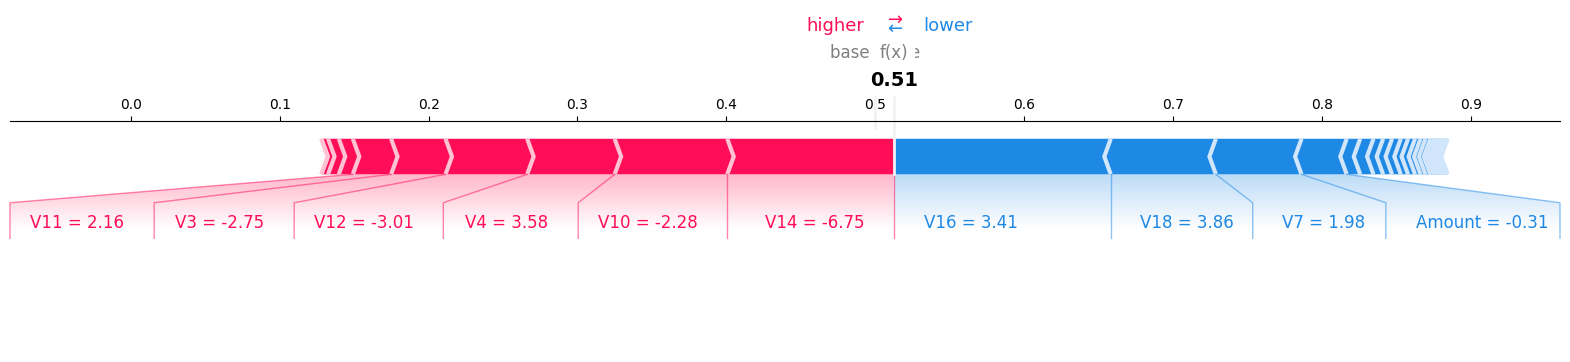

In [ ]:
shap_explainer.plot_force(false_positive) # false positive (legitimate flagged as fraud)

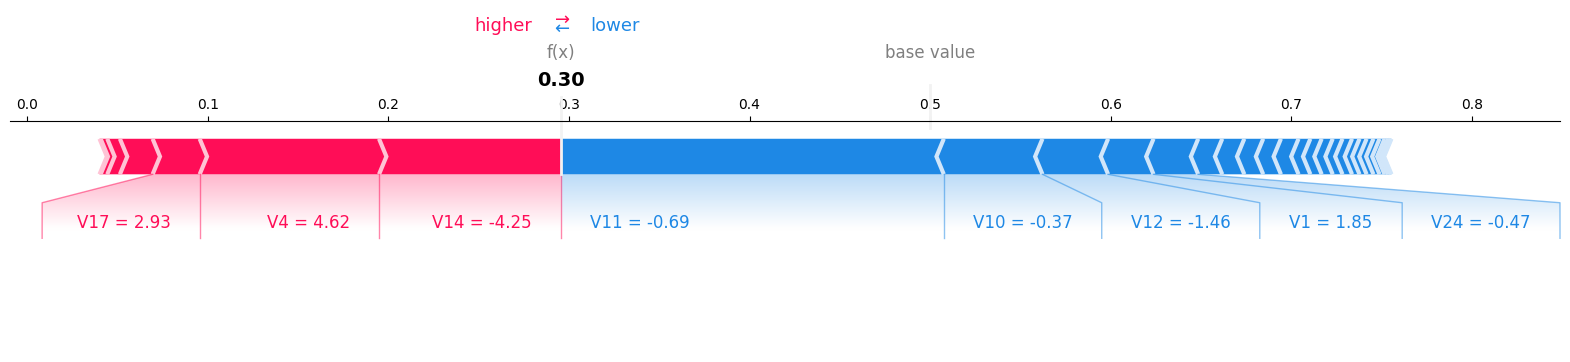

In [ ]:
shap_explainer.plot_force(false_negative) # false negative (missed fraud)